# Importacion de librerias y carga de data

In [2]:
import pandas as pd
import numpy as np

features = ['Sales Price', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
#load de la informacion del .npy
data = np.load('proyecto_training_data.npy') #100
#declaramos los porcentajes para entrenamiento (percent_train)
percent_train = 0.8
#Calculamos en base al porcentaje de entrenamiento el tamaño del array de entrenamiento
data_train_size = data.shape[0] * percent_train
#Dividimos la infomacion del load

data_train = data[0:int(data_train_size)] #80

data_val_test = data[int(data_train_size):] #20

In [ ]:
Calculos de Media, valor maximo, valor minimo, rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
desviacion estandar

In [3]:
#Cambio de nan por medias en datos completos
df_data = pd.DataFrame(data, columns=features)
for index in features:
    print(index)
    mean = df_data[index].mean()
    print(mean)
    df_data[index].fillna(mean)

Sales Price
180921.19589041095
OverallQual
6.0993150684931505
1stFlrSF
1162.626712328767
TotRmsAbvGrd
6.517808219178082
YearBuilt
1971.267808219178
LotFrontage
70.04995836802665


In [4]:
# Calculos de las medias de los datos completos
median_data = df_data.median(axis=0)
print(median_data)

Sales Price     163000.0
OverallQual          6.0
1stFlrSF          1087.0
TotRmsAbvGrd         6.0
YearBuilt         1973.0
LotFrontage         69.0
dtype: float64


In [5]:
# Calculo de los maximos en los datos de entrenamiento
max_value_data = df_data.max(axis=0)
print(max_value_data)

Sales Price     755000.0
OverallQual         10.0
1stFlrSF          4692.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64


In [6]:
# Calculo de los minimos en los datos completos
min_value_data = df_data.min(axis=0)
print(min_value_data)

Sales Price     34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1872.0
LotFrontage        21.0
dtype: float64


In [7]:
# Calculo de PtP en los datos completos
ptp_data = pd.DataFrame(0, index=np.arange(1), columns=features) 
for index in features:
    ptp_data[index] = max_value_data[index] - min_value_data[index]

ptp_data.head()

Sales Price  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0     720100.0          9.0    4358.0          12.0      138.0        292.0

In [8]:
# Calculo de desviacion estandar en los datos de Validacion
std_data = df_data.std(axis=0)
print(std_data)

Sales Price     79442.502883
OverallQual         1.382997
1stFlrSF          386.587738
TotRmsAbvGrd        1.625393
YearBuilt          30.202904
LotFrontage        24.284752
dtype: float64


In [9]:
import seaborn as sns

In [10]:
print(df_data['Sales Price'])

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: Sales Price, Length: 1460, dtype: float64


<Axes: xlabel='Sales Price', ylabel='Count'>

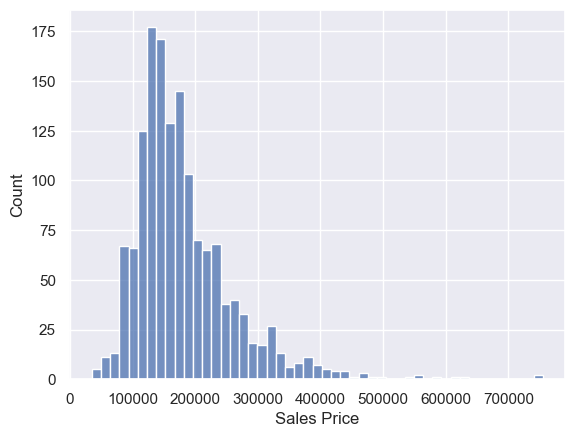

In [11]:
# Plot de Sales Price
sns.set_theme()
sns.histplot(data=df_data[['Sales Price']], linewidth=1, x='Sales Price')

<Axes: ylabel='Count'>

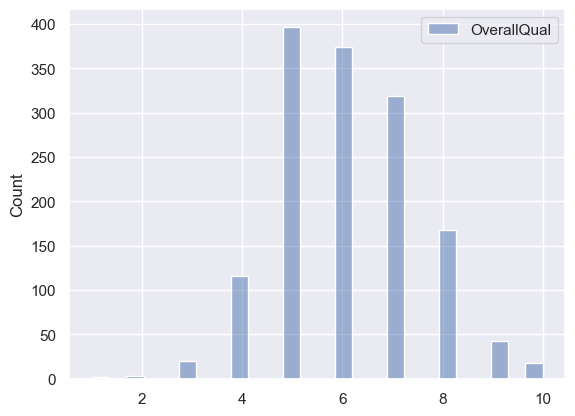

In [13]:
# Plot de OverallQual
sns.set_theme()
sns.histplot(data=df_data[['OverallQual']], linewidth=1)

<Axes: ylabel='Count'>

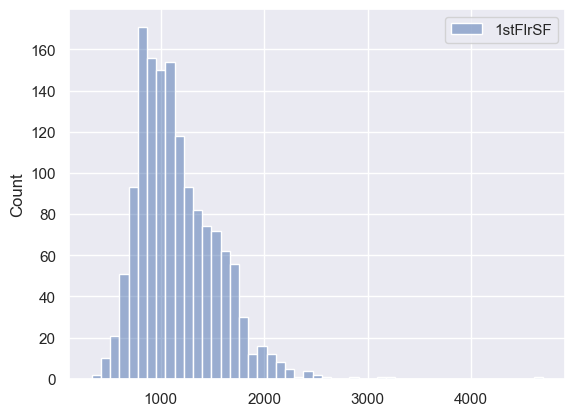

In [14]:
# Plot de 1stFlrSF
sns.set_theme()
sns.histplot(data=df_data[['1stFlrSF']], linewidth=1)

<Axes: ylabel='Count'>

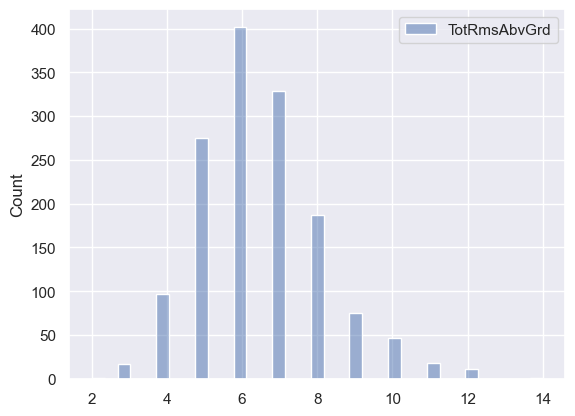

In [15]:
# Plot de TotRmsAbvGrd
sns.set_theme()
sns.histplot(data=df_data[['TotRmsAbvGrd']], linewidth=1)

<Axes: ylabel='Count'>

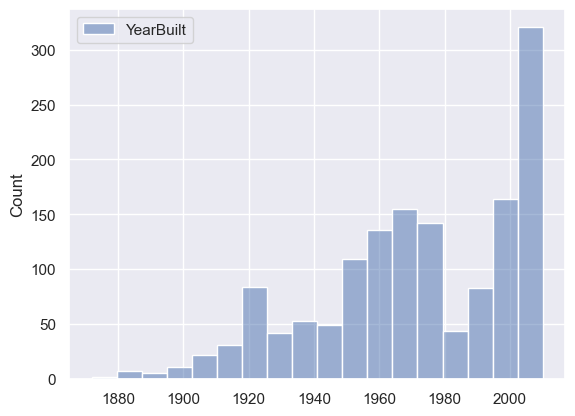

In [16]:
# Plot de YearBuilt
sns.set_theme()
sns.histplot(data=df_data[['YearBuilt']], linewidth=1)

<Axes: ylabel='Count'>

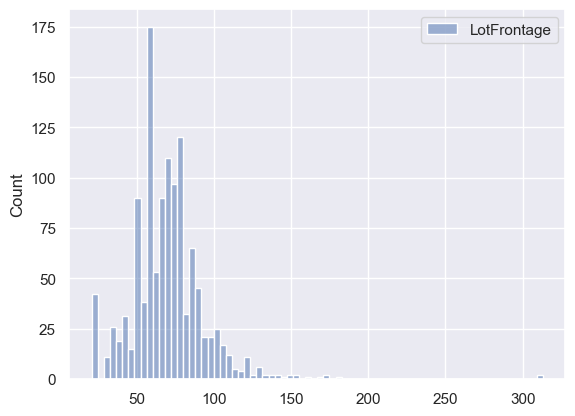

In [17]:
# Plot de LotFrontage
sns.set_theme()
sns.histplot(data=df_data[['LotFrontage']], linewidth=1)

In [18]:
#Calculamos las correlaciones
corr_data = df_data.corr()
print(corr_data)

              Sales Price  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  \
Sales Price      1.000000     0.790982  0.605852      0.533723   0.522897   
OverallQual      0.790982     1.000000  0.476224      0.427452   0.572323   
1stFlrSF         0.605852     0.476224  1.000000      0.409516   0.281986   
TotRmsAbvGrd     0.533723     0.427452  0.409516      1.000000   0.095589   
YearBuilt        0.522897     0.572323  0.281986      0.095589   1.000000   
LotFrontage      0.351799     0.251646  0.457181      0.352096   0.123349   

              LotFrontage  
Sales Price      0.351799  
OverallQual      0.251646  
1stFlrSF         0.457181  
TotRmsAbvGrd     0.352096  
YearBuilt        0.123349  
LotFrontage      1.000000  


In [19]:
import matplotlib.pyplot as plt

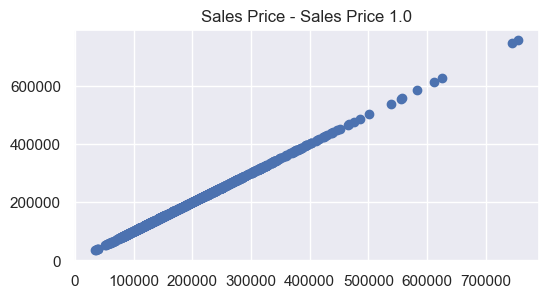

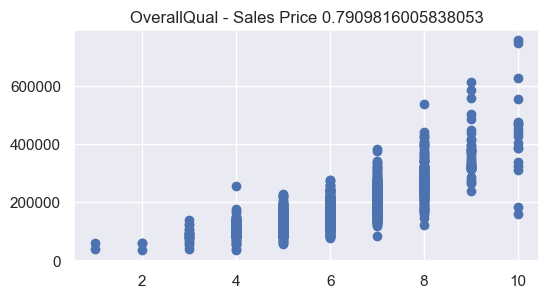

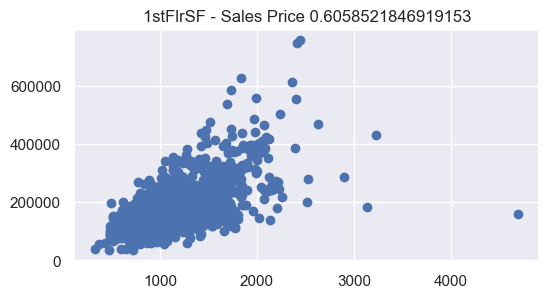

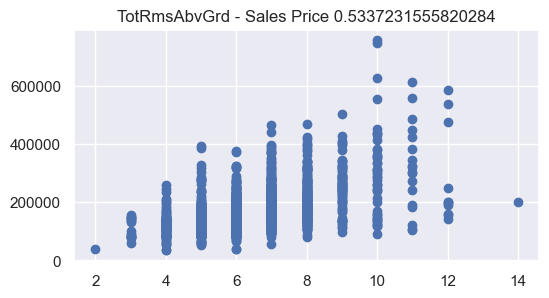

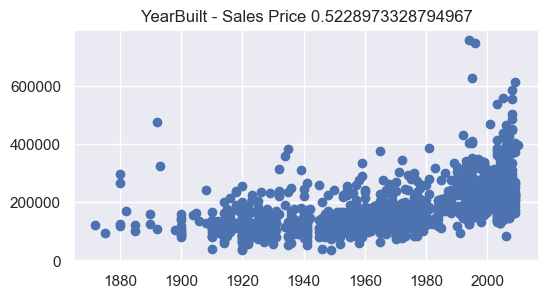

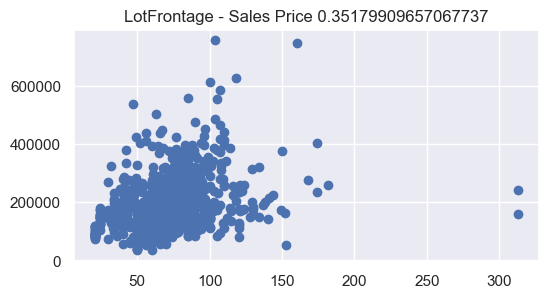

In [20]:
def correlation(data, x, y):
    corr = (pd.DataFrame(data[[x, y]]).corr().iloc[0,1])
    plt.figure(figsize = (6,3))
    plt.scatter(data = data, x = x, y = y)
    plt.title(str(x)+' - '+ str(y) + ' ' + str(corr))
    plt.show()
    return round(corr,4)

for i in features:
    correlation(df_data, i, "Sales Price")

# Basados en los datos encontrados y en la teoria de coeficiente de correlacion vamos a tomar los 2 siguientes datos: Sales Price, OverallQual y 1stFlrSF 
# como nuestras variables para nuestro modelo de prediccion, ya que es la que mas se aproxima a 1

In [21]:
class linear_regretion_manual():
    def __init__(self):
        self.errors = []
        self.models = {}
        
    def fit_manual(self, independent, dependent, epochs = 10, print_each_error=1, learning_rate = 0.1):
        self.print_each_error = print_each_error
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.independent = independent
        self.dependent = dependent
        self.vect_ones = np.ones_like(independent).reshape(-1,1)
        self.xr = independent[:, np.newaxis]
        self.xr = np.hstack([self.xr,self.vect_ones])
        self.yr = dependent[:, np.newaxis]
        rng =np.random.default_rng(seed=1)
        self.beta_0 = rng.random()
        self.beta_1 = rng.random()
        self.parameters = np.array([[self.beta_0],[self.beta_1]])

        
        for i in range(0, self.epochs):
            self.y_pred = np.matmul(self.xr, self.parameters)

            self.e = 1/(2*self.yr.shape[0]) * np.sum((self.yr - self.y_pred)**2)
            self.errors.append(self.e)
            
            #Almacenando los datos del modelo para su posterior ploteo**
            self.models[i] = self.parameters

            self.gradient = (1/self.yr.shape[0]) * sum((self.y_pred - self.yr)*self.xr)
            self.mult_gradient = (self.learning_rate*self.gradient)
            self.mult_gradient = self.mult_gradient.reshape((-1,1))

            self.parameters = self.parameters - self.mult_gradient

            if i % self.print_each_error == 0:
                print(f'Iteración: {i}, error: {self.e}')
                print("")
         
    def trained_history(self):
        return self.models , np.array(self.errors)
        
    def predict_manual(self, x_rp):
        self.x_rp = x_rp
        self.vect_ones_xp = np.ones_like(self.x_rp).reshape(-1,1)
        self.xp = np.reshape(self.x_rp,(-1,1))
        self.xp = np.hstack([self.xp,self.vect_ones_xp])
        self.yp = np.matmul(self.xp, self.parameters)
        return self.yp
    def error_manual(y, y_predict):
        return 1/(2*y.shape[0]) * np.sum((y_predict - y)**2)

In [22]:
data_train = pd.DataFrame(data_train, columns = features)
train_OverallQual = np.array(data_train['OverallQual']) 
train_1stFlrSF = np.array(data_train['1stFlrSF'])
train_SalePrice = np.array(data_train['Sales Price'])

In [23]:
each_print = 100
model_OverallQual = linear_regretion_manual()
model_OverallQual.fit_manual(train_OverallQual, 
                     train_SalePrice, 
                     1000,each_print,0.01)

Iteración: 0, error: 19408942399.954296

Iteración: 100, error: 1372373507.5584512

Iteración: 200, error: 1351998976.815619

Iteración: 300, error: 1333465688.4051542

Iteración: 400, error: 1316607249.6199415

Iteración: 500, error: 1301272304.6290524

Iteración: 600, error: 1287323175.5982034

Iteración: 700, error: 1274634626.6118937

Iteración: 800, error: 1263092739.2996507

Iteración: 900, error: 1252593890.0717175



In [24]:
model_OverallQual_models, model_OverallQual_errors = model_OverallQual.trained_history()

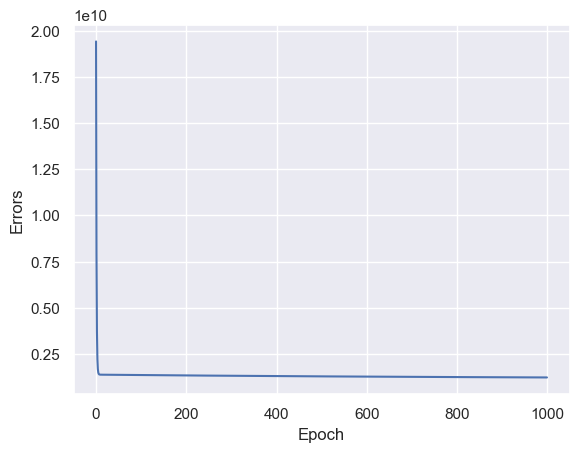

In [25]:
def history_errors_plot(errors):
    plt.figure()
    plt.plot(errors)
    plt.xlabel("Epoch")
    plt.ylabel("Errors")
    plt.show()


history_errors_plot(model_OverallQual_errors)

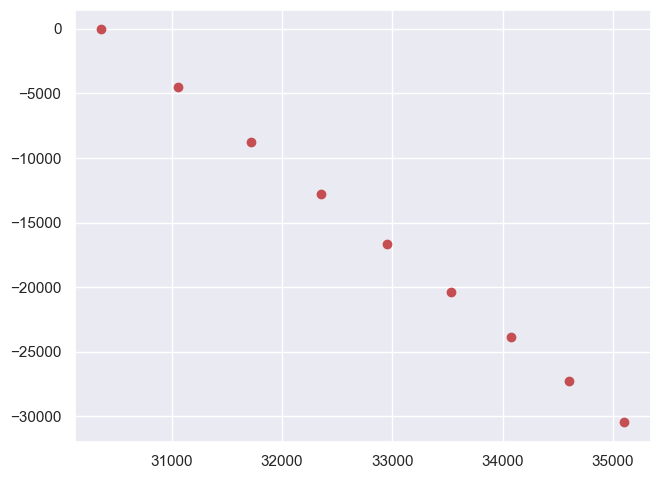

In [26]:
def history_model_plot(history_model, steps_print):
    fig = plt.figure()
    axes =  fig.add_axes([0.1,0.1,0.9,0.9])
    i = 0
    for model_key in history_model.keys():
        if model_key % steps_print == 0 and model_key != 0:
            axes.plot(history_model[model_key][0],  history_model[model_key][1], 'ro')# x b0, y b1
    plt.show()

history_model_plot(model_OverallQual_models, each_print)

In [27]:
model_1stFlrSF = linear_regretion_manual()
model_1stFlrSF.fit_manual(train_1stFlrSF, 
                     train_SalePrice, 
                     1000,each_print,0.000001)

Iteración: 0, error: 19293580850.92146

Iteración: 100, error: 1968089541.5052557

Iteración: 200, error: 1968088719.8345578

Iteración: 300, error: 1968087898.1793952

Iteración: 400, error: 1968087076.5397663

Iteración: 500, error: 1968086254.9156718

Iteración: 600, error: 1968085433.3071103

Iteración: 700, error: 1968084611.7140827

Iteración: 800, error: 1968083790.136588

Iteración: 900, error: 1968082968.5746267



In [28]:
model_1stFlrSF_models, model_1stFlrSF_errors = model_1stFlrSF.trained_history()

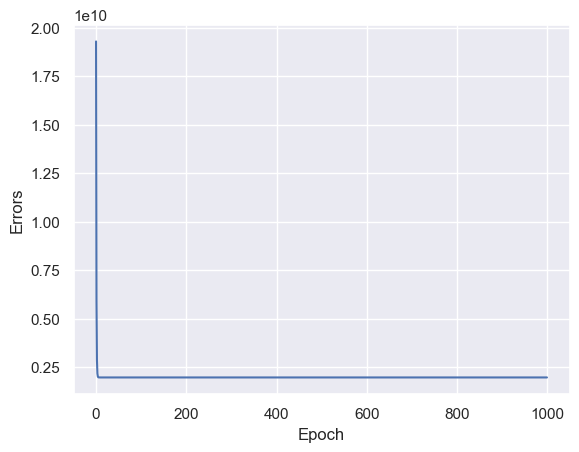

In [29]:
history_errors_plot(model_1stFlrSF_errors)

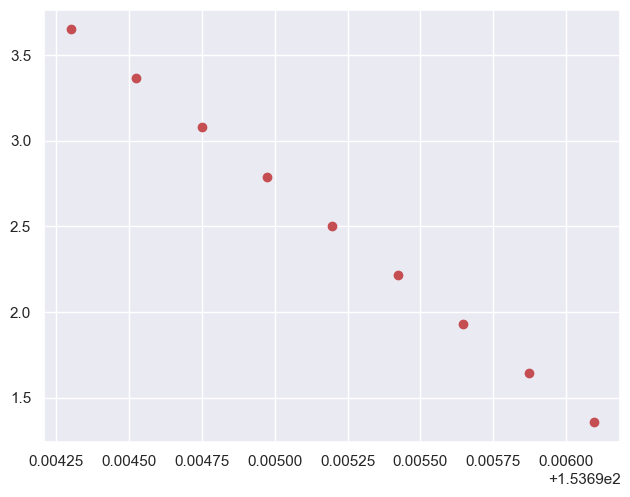

In [30]:
history_model_plot(model_1stFlrSF_models, each_print) #Pendiente

In [31]:
from sklearn.linear_model import LinearRegression

#x = datos independientes, y = datos dependientes
skl_OverallQual = LinearRegression().fit(train_OverallQual.reshape(-1,1), train_SalePrice.reshape(-1,1))
skl_1stFlrSF = LinearRegression().fit(train_1stFlrSF.reshape(-1,1), train_SalePrice.reshape(-1,1))

In [32]:
def models_comparative(model_manual, model_skl , test_values):
    result_manual = model_manual.predict_manual(test_values)
    result_skl = model_skl.predict(test_values.reshape(-1,1))
    averages = (result_manual + result_skl)/2
    return result_manual, result_skl, averages

In [33]:
def plt_comparative_error(comparative, y):
        i = 0
        labels = []
        errors = []
        for value in comparative:
            i += 1
            errors.append(linear_regretion_manual.error_manual(value, y))
            modelo = ""
            if i == 1:
                modelo = "Manual"
            elif i == 2:
                modelo = "SKL"
            elif i == 3:
                modelo = "Promedio"
            labels.append('Modelo: '+ modelo + '\n'+str(round(linear_regretion_manual.error_manual(value, y),0)))
        plt.figure(figsize =(8,5))
        fig, ax = plt.subplots()
        ax.bar(labels, errors)
        fig.tight_layout()
        plt.show()

In [34]:
df_test = pd.DataFrame(data_val_test, columns = ['SalePrice','OverallQual', '1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
test_OverallQual = np.array(df_test['OverallQual'])
test_1stFlrSF = np.array(df_test['1stFlrSF'])
test_SalePrice = np.array(df_test['SalePrice'])

In [35]:
comparative_OverallQual = models_comparative(model_OverallQual, skl_OverallQual, test_OverallQual)
comparative_1stFlrSF = models_comparative(model_1stFlrSF, skl_1stFlrSF, test_1stFlrSF)

In [36]:
print(comparative_OverallQual)

(array([[179976.56754215],
       [322301.08911002],
       [179976.56754215],
       [179976.56754215],
       [215557.69793412],
       [144395.43715018],
       [179976.56754215],
       [251138.82832608],
       [144395.43715018],
       [179976.56754215],
       [144395.43715018],
       [144395.43715018],
       [215557.69793412],
       [251138.82832608],
       [322301.08911002],
       [144395.43715018],
       [144395.43715018],
       [144395.43715018],
       [ 73233.17636624],
       [251138.82832608],
       [215557.69793412],
       [215557.69793412],
       [108814.30675821],
       [251138.82832608],
       [144395.43715018],
       [179976.56754215],
       [179976.56754215],
       [179976.56754215],
       [215557.69793412],
       [215557.69793412],
       [215557.69793412],
       [108814.30675821],
       [108814.30675821],
       [215557.69793412],
       [144395.43715018],
       [215557.69793412],
       [144395.43715018],
       [215557.69793412],
       [108

<Figure size 800x500 with 0 Axes>

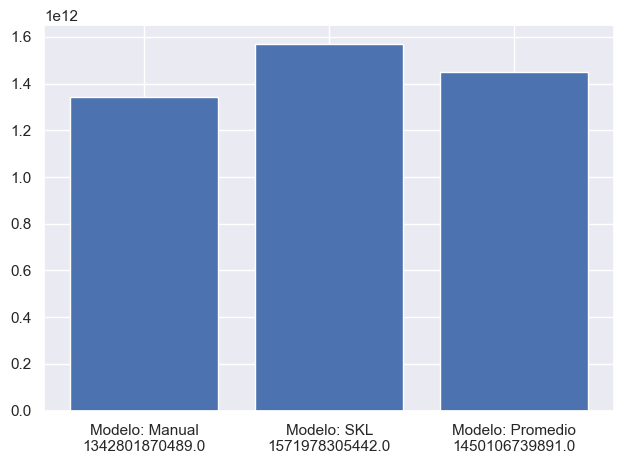

In [37]:
plt_comparative_error(comparative_OverallQual, test_SalePrice)

<Figure size 800x500 with 0 Axes>

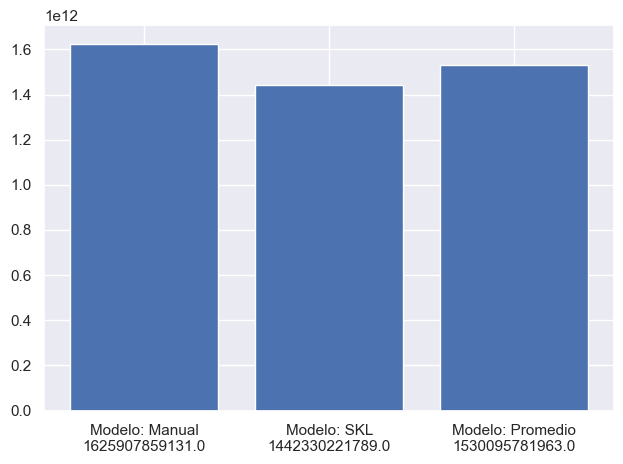

In [39]:
plt_comparative_error(comparative_1stFlrSF, test_SalePrice)

## Para la variable OverallQual: Es mejor el modelo manual
## Para la variable 1stFlrSF: Es mejor utilizar el modelo de SKL